In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
def dictsort(dict):
    
    dict2={}
    key_list=list(dict.keys())
    value_list= list(dict.values())


    for i in (key_list[:len(key_list)-1]):
        for j in (key_list[1:len(key_list)]):
            if j<i:
                temp=j
                key_list[key_list.index(j)]=i
                key_list[key_list.index(i)]=temp
            else:
                continue

    for key, value in zip(key_list, value_list):
        dict2[key]= dict[key]

    return dict2

In [3]:
def padd(d, bits):
    
    for i in range(0,2**bits):
            if i in list(d.keys()):
                continue
            else:
                d[i]=0
    d= dictsort(d)
    return d

In [4]:
def freq(image):
    hist={}
    count=0
    for arr in image:
        for val in arr:
            hist[val]=count
    
    for arr in image:
        for val in arr:
            value = hist[val]
            value+=1
            hist[val]=value
    
    
    hist = dictsort(hist)  
    return hist

In [5]:
def hist(image):
    
    hist=freq(image)
    
    pixel_intensity=[]
    frequency=[]
    
    for key, value in hist.items():
        pixel_intensity.append(key)
        frequency.append(value)
        
    plt.bar(pixel_intensity,frequency)
    plt.show()
    return hist

In [6]:
def histEqual(img, bits):
    
    dict1=freq(img)
    paddedDict=padd(dict1,bits)
    fk= list(paddedDict.keys())
    #print(fk)
    nk= list(paddedDict.values())
    #print(nk)
    pk= [element / sum(nk) for element in nk]
    #print(pk)
    ck= []
    s=0
    
    for elements in pk:
        s=s+elements
        ck.append(s)
    #print(ck)
    maxmul= [element*max(fk)  for element in ck]
    #print(maxmul)
    roundList= [round(element) for element in maxmul]
    #print(roundList)
    changeDict={}
    
    for i, j in zip(fk,roundList) :
        changeDict[i]=j
    
    new_img=img.copy()
    
    for i in range (new_img.shape[0]):
        for j in range (new_img.shape[1]):
            new_img[i][j]=changeDict[new_img[i][j]]
            
    return new_img

In [7]:
def closeto (list1, list2):
    absL=[]
    abs_dict={}
    for val1 in list1:
        absL=[]
        for val2 in list2:
            if val1== val2:
                absL=[]
                #print(f'{val1} = {val2}')
                abs_dict[val1]=val2
                break
            else:
                abs_diff=abs(val1-val2)
                absL.append(abs_diff)
        if len(absL)>0:
            abs_dict[val1]=list2[absL.index(min(absL))]     
    return abs_dict
        

In [8]:
def histMatch(img1, img2):
    
    f1= freq(img1)
    f2= freq(img2)
    d1={}
    d2={}
    s1=0
    s2=0
    for i, j in zip(f1.items(),f2.items()):
        s1=s1+i[1]
        s2=s2+j[1]
        d1[i[0]]=s1
        d2[s2]=j[0]
    print(d1,d2)
    
    l1=list(d1.values())
    l2=list(d2.keys())
    mapdict=closeto(l1,l2)
    
    changeDict={}
    
    for i in zip(d1.items(), mapdict.items(),d2.items()):
        changeDict[i[0][0]]=d2[i[1][1]]
    
    print(changeDict)
    
    new_img=img1.copy()
    
    for i in range (new_img.shape[0]):
        for j in range (new_img.shape[1]):
            new_img[i][j]=changeDict[new_img[i][j]]
    return new_img

[[0 2 1 3 4]
 [1 3 4 3 3]
 [0 1 3 1 4]
 [3 1 4 2 0]
 [0 4 2 4 4]]


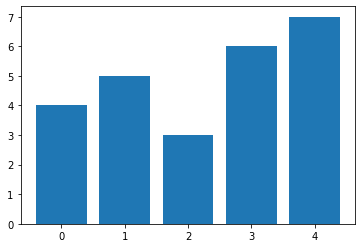

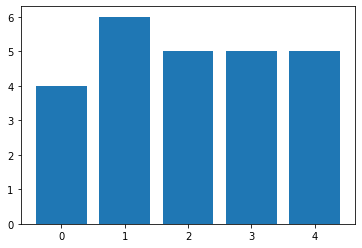

{0: 4, 1: 9, 2: 12, 3: 18, 4: 25} {4: 0, 10: 1, 15: 2, 20: 3, 25: 4}
{0: 0, 1: 1, 2: 1, 3: 3, 4: 4}
[[0 1 1 3 4]
 [1 3 4 3 3]
 [0 1 3 1 4]
 [3 1 4 1 0]
 [0 4 1 4 4]]


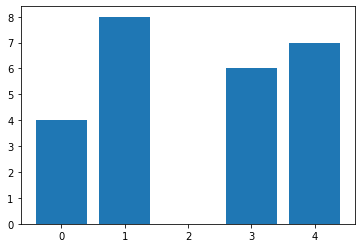

{0: 4, 1: 8, 3: 6, 4: 7}

In [9]:
l1=np.array([[0,2,1,3,4],[1,3,4,3,3],[0,1,3,1,4],[3,1,4,2,0],[0,4,2,4,4]])
l2=np.array([[2,1,2,1,0],[3,3,2,4,4],[1,3,2,4,4],[0,0,3,2,1],[1,3,1,4,0]])

print(l1)
hist(l1)
hist(l2)
l1_match=histMatch(l1,l2)
print(l1_match)
hist(l1_match)

In [10]:
x=[[0,2,1,3,4],[1,3,4,3,3],[0,1,3,1,4],[3,1,4,2,0],[0,4,2,4,4]]

x=freq(x)

x=padd(x,8)

print(x)

{0: 4, 1: 5, 2: 3, 3: 6, 4: 7, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [11]:
l1=[4,9,12,18,25]
l2=[4,10,15,20,25]

print(closeto(l1,l2))

{4: 4, 9: 10, 12: 10, 18: 20, 25: 25}


In [12]:
my_img=np.array([[3,3,3,3],[3,3,3,3],[2,2,3,3],[2,2,3,3]])

histEqual(my_img,1)

array([[3, 3, 3, 3],
       [3, 3, 3, 3],
       [1, 1, 3, 3],
       [1, 1, 3, 3]])

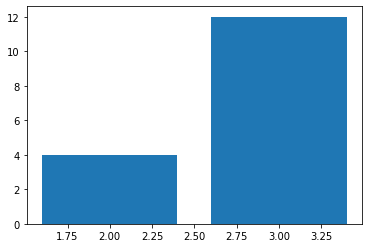

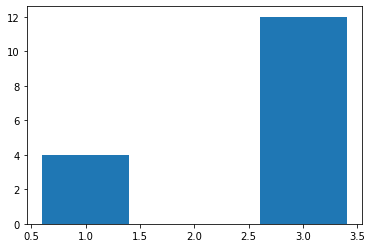

{1: 4, 3: 12}

In [13]:
my_img=np.array([[3,3,3,3],[3,3,3,3],[2,2,3,3],[2,2,3,3]])

hist(my_img)

new_img=histEqual(my_img,2)

hist(new_img)

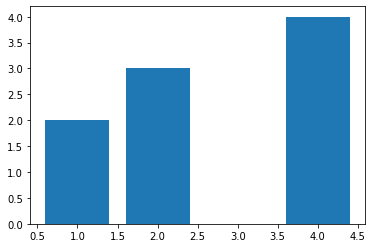

In [14]:
my_list=np.array([[1,2,4],[2,2,1],[4,4,4]])
dict2=hist(my_list)

In [15]:
#importing image
img= cv2.imread('0791.png')

In [16]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'RGB image with dim: (1356, 2040, 3)')

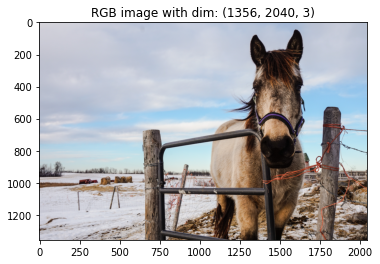

In [17]:
plt.imshow(rgb)
plt.title(f'RGB image with dim: {rgb.shape}')

In [18]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

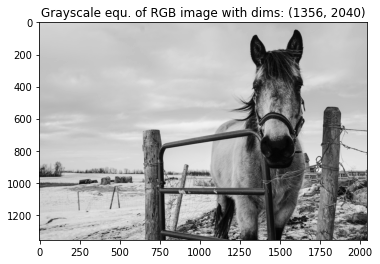

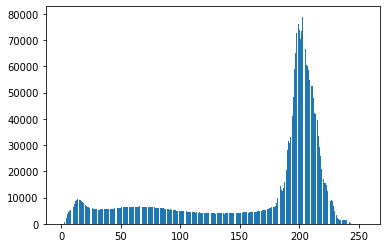

In [19]:
plt.imshow(grayscale, cmap='gray')
plt.title(f'Grayscale equ. of RGB image with dims: {grayscale.shape}')
plt.show()
d1=hist(grayscale)

In [20]:
#using my function

eq_img=histEqual(grayscale,8)

Text(0.5, 1.0, 'Image after histogram equilization')

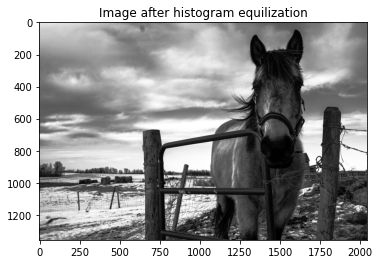

In [21]:
plt.imshow(eq_img,cmap='gray')
plt.title('Image after histogram equilization')

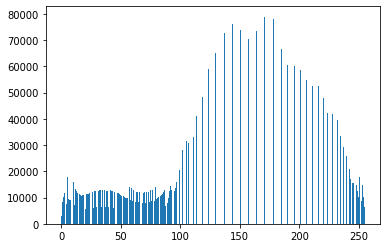

In [22]:
dict1=hist(eq_img)

In [23]:
#resizing the initial image

width = int(720)
height = int(720)
dim = (width, height)
  
groundTruth= cv2.resize(grayscale, dim, interpolation = cv2.INTER_AREA)

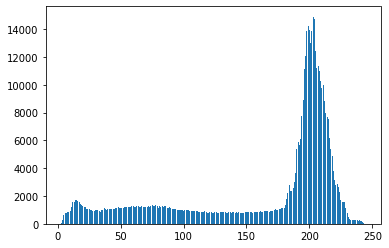

In [24]:
gtDict=hist(groundTruth)

In [52]:
print(grayscale.shape, groundTruth.shape)

(1356, 2040) (720, 720)


In [53]:
#resizing the initial image to lower dimensions

width = int(groundTruth.shape[1] /4)
height = int(groundTruth.shape[0] /4)
dim = (width, height)
  
lowRes4 = cv2.resize(groundTruth, dim, interpolation = cv2.INTER_AREA)

In [54]:
#resizing the initial image to lower dimensions

width = int(groundTruth.shape[1] /8)
height = int(groundTruth.shape[0] /8)
dim = (width, height)

(int(groundTruth.shape[1] /8),int(groundTruth.shape[0] /8))
  
lowRes8 = cv2.resize(groundTruth, dim, interpolation = cv2.INTER_AREA)


Text(0.5, 1.0, 'Image resized to lower dims. (90, 90)')

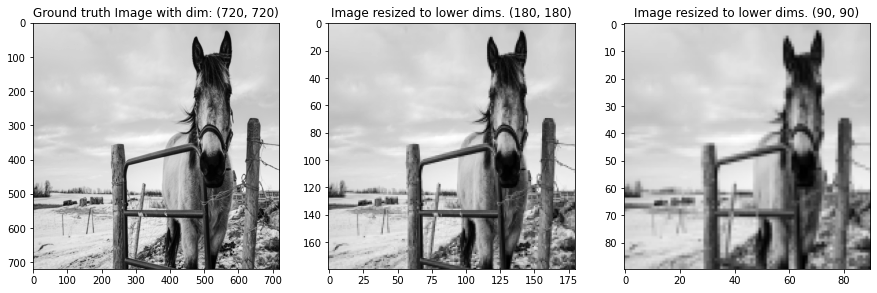

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.imshow(groundTruth, cmap='gray')
plt.title(f'Ground truth Image with dim: {groundTruth.shape}')
plt.subplot(132)
plt.imshow(lowRes4, cmap='gray')
plt.title(f'Image resized to lower dims. {lowRes4.shape}')
plt.subplot(133)
plt.imshow(lowRes8, cmap='gray')
plt.title(f'Image resized to lower dims. {lowRes8.shape}')

In [57]:
#resizing the resized image to get HR image

inputImage = cv2.resize(lowRes8,None, fx = 8, fy = 8, interpolation = cv2.INTER_CUBIC)

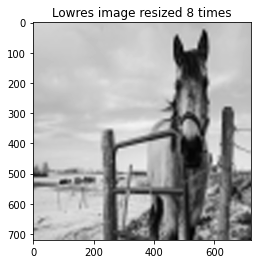

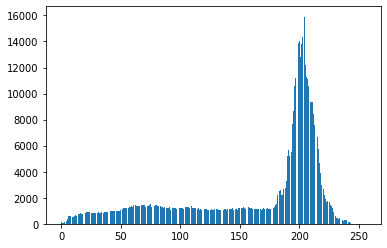

In [78]:
plt.imshow(inputImage,cmap='gray')
plt.title('Lowres image resized 8 times')
plt.show()
inputDict=hist(inputImage)

In [ ]:
inputDict=

In [134]:
## designing pytorch deep learning model

#imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader   #easier dataset management - minibatches of datasets to train on
import torchvision.transforms as transforms  #transformations to perform on datasets

In [135]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [178]:
#creating the Model arch.

class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.l1=nn.Linear(input_size, 500)
        self.l2=nn.Linear(500, output_size)
    
    def forward(self, x):
        x= self.l1(x)
        x= torch.nn.functional.relu(x)
        x= self.l2(x)
        return x
    
    def normalize(self,x):
        x= (x-torch.mean(x))/(torch.std(x))
        return x

In [179]:
model= Model(256,256)

In [ ]:
model.normalize

In [180]:
x= torch.randn(100,256)
x.shape

torch.Size([100, 256])

In [181]:
print(torch.mean(x),torch.std(x))

tensor(0.0068) tensor(1.0011)


In [83]:
x= torch.FloatTensor(x)

In [146]:
x= (x-torch.mean(x))/torch.std(x)

In [147]:
x.shape

torch.Size([100, 256])

In [182]:
model.normalize(x)

tensor([[ 0.7673, -0.5501,  1.1491,  ...,  1.3227, -0.7151, -0.3131],
        [ 0.0775,  0.0624, -1.1522,  ..., -0.3939,  1.3554,  1.6450],
        [-0.3827,  0.1341,  0.6243,  ..., -0.5169,  0.3093, -0.0942],
        ...,
        [-0.3606, -0.8683, -0.7042,  ..., -0.5752, -1.5493, -0.0095],
        [ 1.2574, -1.2509,  0.9407,  ...,  0.4505, -1.6669,  1.5300],
        [ 0.6725,  1.4161, -1.3719,  ...,  0.2382,  0.6608,  0.4908]])

In [183]:
model.forward(x).shape

torch.Size([100, 256])

In [184]:
#defining hyperparameters

input_size=256
out_size=256
learning_rate=0.01
batch_size=64
num_epochs=1

In [149]:
model(x).shape

torch.Size([100, 256])

In [159]:
x=list(inputDict.values())

In [160]:
x= torch.FloatTensor(x)

In [161]:
x.shape

torch.Size([255])

In [ ]:
model.

In [154]:
x= (x-torch.mean(x))/torch.std(x)

In [155]:
print(x)

tensor([-0.6336, -0.6682, -0.6644, -0.6556, -0.6214, -0.5600, -0.4799, -0.4945,
        -0.4948, -0.5250, -0.5176, -0.4850, -0.4575, -0.4738, -0.4416, -0.4260,
        -0.4185, -0.4314, -0.4419, -0.4223, -0.4178, -0.3761, -0.3754, -0.3870,
        -0.3822, -0.3995, -0.4172, -0.4070, -0.3999, -0.4050, -0.4114, -0.3921,
        -0.4012, -0.4050, -0.3897, -0.3968, -0.3697, -0.3788, -0.3860, -0.3819,
        -0.3768, -0.3500, -0.3534, -0.3551, -0.3524, -0.3432, -0.3517, -0.3575,
        -0.3476, -0.3436, -0.3249, -0.2988, -0.2818, -0.2656, -0.2757, -0.2686,
        -0.2751, -0.2605, -0.2537, -0.2323, -0.2567, -0.1991, -0.2103, -0.2194,
        -0.2347, -0.2340, -0.2330, -0.2062, -0.1984, -0.1926, -0.2025, -0.2391,
        -0.2238, -0.2184, -0.2093, -0.1848, -0.2432, -0.1913, -0.2187, -0.1981,
        -0.2086, -0.2198, -0.2140, -0.2371, -0.2550, -0.2513, -0.2852, -0.2530,
        -0.2784, -0.2805, -0.2808, -0.2639, -0.3188, -0.2845, -0.2737, -0.2723,
        -0.2900, -0.2947, -0.2913, -0.29

In [185]:
#INITIALIZING MODEL

model= Model(input_size=input_size, output_size=out_size)
model.to(device=device)

Model(
  (l1): Linear(in_features=256, out_features=500, bias=True)
  (l2): Linear(in_features=500, out_features=256, bias=True)
)

In [186]:
#initializing loss function and optimizer

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [187]:
train_loader= DataLoader(dataset=x, batch_size=batch_size, shuffle= True) 

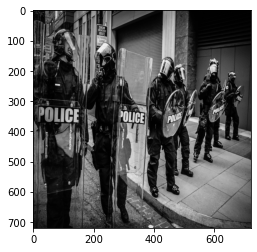

In [211]:
#preparing dataset

trainDir='DIV2K_train_HR\\DIV2K_train_HR'
width = int(720)
height = int(720)
dim = (width, height)
trainDataX=[]
trainDataY=[]

for filename in os.listdir(trainDir):
    img = cv2.imread(os.path.join(trainDir,filename))
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    groundTruth= cv2.resize(grayscale, dim, interpolation = cv2.INTER_AREA)
    
    dict1=freq(groundTruth)
    dict1=padd(dict1,8)
    
    plt.imshow(groundTruth, cmap='gray')
    
    trainDataX.append(list(dict1.values()))
    
    lowRes8 = cv2.resize(groundTruth,(int(groundTruth.shape[1] /8),int(groundTruth.shape[0] /8)) , interpolation = cv2.INTER_AREA)
    
    inputImage = cv2.resize(lowRes8,None, fx = 8, fy = 8, interpolation = cv2.INTER_CUBIC)
    
    dict2=freq(inputImage)
    dict2=padd(dict2,8)
    
    trainDataY.append(list(dict2.values()))